In [6]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Trajectory dictionary
trj={}
trj 

{}

Parameters of projection : initial velocity (u), angle of projection($\alpha$), g , height of projection point(h)

In [8]:
u=20 #initial velocity in m/s
alp= 33*np.pi/180 #projection angle in radian
g=9.8 #acceleration due to gravity in m/s^2
h=1.5 #height of projection point

In [9]:
alp


0.5759586531581288

$ u_x = u \cos\alpha$      ,           $ u_y = u \sin \alpha $

In [10]:
#Horizontal and vertical velocities 
ux0=u*math.cos(alp)
uy0=u*math.sin(alp)

In [11]:
ux0,uy0


(16.773411358908483, 10.892780700300541)

Time of flight for y=0 projection : 
$T_0 = \sqrt{\frac{2u_y}{g}}$ = $\sqrt{\frac{2u \sin\alpha}{g}}$

In [12]:
#time of flight for y=0 projection

T0= 2*uy0/g
T0

2.2230164694490897

Time of flight for y=h projection

$ T = T_0+ \frac{-2u_y + \sqrt{4u_y^2+8gh}}{2g}$


$T=T_0+\frac{-u_y+\sqrt{u_y^2+2gh}}{g}$

In [13]:
T=T0+(-uy0+np.sqrt(uy0**2+2*g*h))/g
T

2.3531092192763716

In [14]:
for t in np.arange(0,T,0.01):
    x=ux0*t
    y=h+uy0*t-1/2*g*t**2
    trj.update({t:[t,x,y]})
    
        
        
           

In [15]:
trj #stores trajectory history

{0.0: [0.0, 0.0, 1.5],
 0.01: [0.01, 0.16773411358908483, 1.6084378070030052],
 0.02: [0.02, 0.33546822717816965, 1.7158956140060109],
 0.03: [0.03, 0.5032023407672545, 1.8223734210090163],
 0.04: [0.04, 0.6709364543563393, 1.9278712280120216],
 0.05: [0.05, 0.8386705679454242, 2.032389035015027],
 0.06: [0.06, 1.006404681534509, 2.1359268420180326],
 0.07: [0.07, 1.174138795123594, 2.238484649021038],
 0.08: [0.08, 1.3418729087126786, 2.3400624560240435],
 0.09: [0.09, 1.5096070223017635, 2.4406602630270484],
 0.1: [0.1, 1.6773411358908483, 2.540278070030054],
 0.11: [0.11, 1.8450752494799332, 2.6389158770330594],
 0.12: [0.12, 2.012809363069018, 2.736573684036065],
 0.13: [0.13, 2.180543476658103, 2.8332514910390705],
 0.14: [0.14, 2.348277590247188, 2.928949298042076],
 0.15: [0.15, 2.516011703836272, 3.023667105045081],
 0.16: [0.16, 2.6837458174253572, 3.1174049120480865],
 0.17: [0.17, 2.8514799310144423, 3.210162719051092],
 0.18: [0.18, 3.019214044603527, 3.3019405260540973],
 

In [16]:
trjy=pd.DataFrame.from_dict(trj).T #changed to dataframe and transposed


In [17]:
trjy.columns=['time','x-coord','y-coord']

In [18]:
trjy.head()

,time,x-coord,y-coord
0.00,0.00,0.000000,1.500000
0.01,0.01,0.167734,1.608438
0.02,0.02,0.335468,1.715896
0.03,0.03,0.503202,1.822373
0.04,0.04,0.670936,1.927871


In [19]:
trjy.tail()

,time,x-coord,y-coord
2.31,2.31,38.746580,0.515433
2.32,2.32,38.914314,0.397491
2.33,2.33,39.082048,0.278569
2.34,2.34,39.249783,0.158667
2.35,2.35,39.417517,0.037785


In [20]:
trjy.set_index('time') #set time as index

,x-coord,y-coord
time,,
0.00,0.000000,1.500000
0.01,0.167734,1.608438
0.02,0.335468,1.715896
0.03,0.503202,1.822373
0.04,0.670936,1.927871
...,...,...
2.31,38.746580,0.515433
2.32,38.914314,0.397491
2.33,39.082048,0.278569


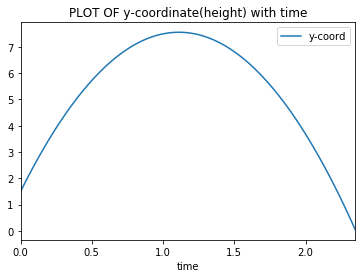

In [21]:
#PLOT OF y-coordinate(height) with time
trjy.plot(x='time',y='y-coord',title='PLOT OF y-coordinate(height) with time')

[Text(0, 0.5, 'Height in metres'), Text(0.5, 0, 'Distance in metres')]

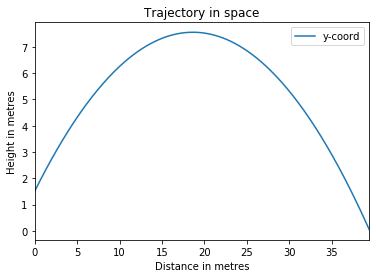

In [22]:
#Plot of trajectory in space, y-coordinate versus x-coordinate
trjy.plot(x='x-coord', y='y-coord',title='Trajectory in space').set(xlabel="Distance in metres", ylabel="Height in metres")


In [23]:
#maximum height:theoretical
Ht=uy0**2/(2*g)+h
Ht


7.5537077237163235

In [24]:
H= max(trjy['y-coord']) #maximum height calculated

In [25]:
#error
(H-Ht)/Ht*100


-0.00014756174226330008

In [26]:
#finding time of landing when y-coord equals zero
trjy[trjy['y-coord']//1==0]


,time,x-coord,y-coord
2.27,2.27,38.075644,0.977402
2.28,2.28,38.243378,0.863380
2.29,2.29,38.411112,0.748378
2.30,2.30,38.578846,0.632396
2.31,2.31,38.746580,0.515433
2.32,2.32,38.914314,0.397491
2.33,2.33,39.082048,0.278569
2.34,2.34,39.249783,0.158667
2.35,2.35,39.417517,0.037785


Range


In [27]:
t_land=trjy[trjy['y-coord']//0.1==0] #approximate time of landing
t_land

,time,x-coord,y-coord
2.35,2.35,39.417517,0.037785


In [ ]:
#Improved range finder
'''
t_land=trjy[trjy['y-coord']==min(trjy['y-coord'])] #approximate time of landing
if t_land['time'].iloc[0]==0 or t_land['time'].iloc[0]<(T/2):                   #time of landing must fall at end of second half of flight
    t_land= trjy.iloc[-1,:]
t_land
'''

In [29]:
type(t_land)

pandas.core.frame.DataFrame

In [30]:
t_landing= t_land['time'].iloc[0]
if t_landing == 0:
    t_landing=t_land['time'].iloc[1] #for h=0 case
t_landing

2.35

In [31]:
R=t_landing*ux0 #calculated range


In [32]:
print("The calculated range is",R)

The calculated range is 39.41751669343493


In [33]:
type(R)

numpy.float64

In [34]:
Rt=T*ux0  #theoretical range
Rt,type(Rt)

(39.46966890736256, numpy.float64)

In [35]:
print("The theoretical range is", Rt ,"metres")

The theoretical range is 39.46966890736256 metres


In [36]:
R,Rt



(39.41751669343493, 39.46966890736256)

# Summary

In [37]:
print("The theoretical time of flight was", T)
print("The calculated time of landing is", t_landing)

The theoretical time of flight was 2.3531092192763716
The calculated time of landing is 2.35


In [38]:
print("The theoretical range was", Rt)
print("The calculated range is",R)

The theoretical range was 39.46966890736256
The calculated range is 39.41751669343493


In [39]:
print("The theoretical maximum height attained in flight : ", Ht)
print("The calculated maximum height attained in flight :", H)

The theoretical maximum height attained in flight :  7.5537077237163235
The calculated maximum height attained in flight : 7.553696577333601
